In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import json
import re
from requests.auth import HTTPBasicAuth
from pandas import json_normalize

In [2]:
paper_shop_csv = pd.read_csv("..\data\shop_paper_info.csv")
paper_shop_csv

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,...,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count
0,0,5627890,tinoiseau,7891149,1250485197,1250485197,rubber stamps | paper goods | printables,"Welcome! Here you will find thank you stamps, ...",USD,False,...,I ship via USPS to many countries - please sen...,"My chief concern is customer satisfaction, so ...","I L-O-V-E custom orders, so please contact me ...",NaN,1652140520,False,True,NaN,5.0000,3.0
1,1,6579872,DaydreamPaperStudio,14823706,1319533134,1319533134,"Stylish hand lettered stationery, prints & pap...",You can also check us out on social media:\nIn...,GBP,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,- This Privacy Policy describes how and when I...,NaN,1652182612,False,True,This Privacy Policy describes how and when I c...,4.9444,54.0
2,2,9039454,LettersToYou,43040627,1433462463,1433462463,Letters To You - Custom Hand Lettered & Laser ...,Hello and Welcome! We hope everyone is staying...,USD,False,...,All pieces in our shop are made to order\n\nCA...,"We do not accept returns or exchanges, but all...",**FREE SHIPPING for the LARGE ITEMS IS ONLY AV...,NaN,1651291218,False,True,NaN,4.9809,314.0
3,3,5325270,luciepritchard,6027215,1215602911,1215602911,Lucie Pritchard Design,HELLO and welcome to my shop. \r\nI am a calli...,GBP,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,- This Privacy Policy describes how and when I...,NaN,1652160580,False,True,This Privacy Policy describes how and when I c...,4.9706,34.0
4,4,11704327,M2Originals,72915631,1480455584,1480455584,M2Originals,NaN,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,"I GLADLY ACCEPT RETURNS, EXCHANGES, AND CANCEL...",NaN,NaN,0,False,False,NaN,5.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,2096,17781165,StoriesBySharpies,159534793,1529176714,1529176714,"prints, stationery, and anything lettered",We&#39;ve just rebranded! Expect lots of new a...,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT EXCHANGES\nJust contact me wit...,NaN,NaN,0,False,False,NaN,NaN,NaN
2097,2097,14051083,OverflowByMelissa,18247583,1494443900,1494443900,Overflow by Melissa,If you would like more cards than the quantity...,USD,False,...,NaN,NaN,NaN,NaN,0,False,False,NaN,5.0000,6.0
2098,2098,23565130,YourDayDIY,313931824,1629750978,1629750978,Premium Printable Templates,New digital shower and party invitation templa...,USD,False,...,DIGITAL DOWNLOADS\nYour files will be availabl...,"I DON'T ACCEPT RETURNS, EXCHANGES, OR CANCELLA...","ARE ANY PHYSICAL ITEMS SHIPPED?\nNo, you will ...",NaN,0,False,False,NaN,4.9762,42.0
2099,2099,21820580,ByDesignCustom,102102587,1575872311,1575872311,Create a life you love ✨,Hello! Thank you so much for visiting my shop!...,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND CANCELLATIONS\nJus...,NaN,NaN,0,False,False,NaN,3.0000,1.0


In [3]:
home_shop_csv = pd.read_csv("..\data\shop_home_info.csv")
home_shop_csv

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,...,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count
0,0,6766412,ArtsyQuotes,19840612,1329442479,1329442479,HAND LETTERED HOME DECOR AND GIFTS,Thanks for coming to my hand-lettered print sh...,USD,False,...,Please allow 1-3 business days for custom prin...,"If you are not satisfied with your purchase, p...",NaN,NaN,1652182917,False,True,NaN,NaN,NaN
1,1,8718556,YourAncientName,38954524,1383184890,1383184890,Combining Historic Research With Hand Crafted Art,We&#39;re glad you&#39;re here! \r\n\r\nWhat&#...,USD,False,...,"Currently, I am offering free shipping for ord...","I sometimes have buyer&#39;s remorse too. So,...","ORDER EARLY, 3-4 WEEKS BEFORE YOU NEED A GIFT,...",NaN,1652149923,False,True,NaN,NaN,NaN
2,2,14333509,TrulyScripted,101112796,1483483904,1483483904,Truly Scripted Signs,WELCOME AND PLEASE **NOTE; Many More Listings ...,USD,False,...,NaN,NaN,NaN,NaN,0,False,False,NaN,5.0000,1.0
3,3,18110774,BibleArtPrintables,162226534,1531784310,1531784310,"Printable Baptism Gifts, Scripture Wall Arts, ...",Spring Sale is now on!!\n*We sell digital prin...,CAD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,NaN,NaN,0,False,False,NaN,4.9867,75.0
4,4,15800102,ShawnaClingerman,121658751,1506120055,1506120055,"Heart, Art & Design",VALENTINES DAY SALE 2022! Save 25% Monday 2/14...,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT EXCHANGES\nJust contact me wit...,- Want to read my privacy policy? Check it out...,NaN,0,False,False,Want to read my privacy policy? Check it out o...,4.9818,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2295,10514292,papercasestudio,59805461,1422705835,1422705835,modern calligraphy for events + home,HEY hey—I&#39;m so glad you&#39;re here! We of...,USD,False,...,Shipping times range vary depending on the shi...,Refunds and/or exchanges cannot be accepted on...,We are taking extra precaution to ensure that ...,NaN,1652171582,False,True,NaN,4.7722,158.0
2296,2296,27646547,StellarPrintCo,442590673,1612404666,1612404666,minimalist downloadable art prints and happy v...,Follow on Insta to be the first to see new des...,USD,False,...,DIGITAL DOWNLOADS\nYour files will be availabl...,"I DON'T ACCEPT RETURNS, EXCHANGES, OR CANCELLA...",NaN,NaN,0,False,False,NaN,4.9897,97.0
2297,2297,6961230,BroussArt,22230797,1338770591,1338770591,Printable Party Invitations and More,NaN,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,NaN,NaN,0,False,False,NaN,4.9401,384.0
2298,2298,22100270,HoldenANoteDesigns,9475303,1579386534,1579386534,NaN,NaN,USD,False,...,NaN,NaN,NaN,NaN,0,False,False,NaN,5.0000,12.0


In [4]:
wed_shop_csv = pd.read_csv("..\data\shop_wed_info.csv")
wed_shop_csv

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,...,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count
0,0,7371868,DebiSementelli,17415724,1392845816,1392845816,Debi Sementelli,NaN,USD,False,...,I use CraftHub.me to handle delivery of the di...,Due to the nature of the products I sell – dig...,"When you purchase a one of my fonts, you are b...",NaN,1652924895,False,True,NaN,5.0000,1.0
1,1,6823707,HereAndNowPublishers,17098880,1332497934,1332497934,CalligraphyArts,Welcome to Here+Now! Offering calligraphy work...,USD,False,...,NaN,NaN,NaN,NaN,0,False,False,NaN,4.8966,58.0
2,2,15943136,mmcalligraphie,18096930,1504831099,1504831099,hand - lettered treasures | custom calligraphy,NaN,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT CANCELLATIONS\nRequest a cance...,NaN,NaN,0,False,False,NaN,5.0000,5.0
3,3,11630683,ScriptedSweetly,66215956,1441326736,1441326736,Calligraphy & Hand Lettering for Home Decor & ...,NaN,USD,False,...,NaN,NaN,NaN,NaN,1464892992,False,False,NaN,5.0000,3.0
4,4,14008975,thepaperedwedding,100636681,1479424518,1479424518,Printable and Paper Wedding Goods,Current Turnaround Time for Customized Items :...,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND CANCELLATIONS\nJus...,HAVE A PROBLEM PRINTING?\nIf you have a proble...,NaN,0,False,False,NaN,4.9670,1755.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,549,7994445,NewallWright,5692445,1365668520,1365668520,WEDDINGS - GIFTS - VINTAGE,Welcome to Newall & Wright - The home of weddi...,GBP,False,...,Delivery is usually made within 3-5 working da...,Please only make a purchase when you are sure ...,NaN,NaN,1652920242,False,True,NaN,4.9870,231.0
550,550,22359916,Kaceique,277007841,1581530199,1581530199,Calligraphy Art and Design,NaN,SGD,False,...,PROCESSING TIME\nThe time I need to prepare an...,"I GLADLY ACCEPT RETURNS, EXCHANGES, AND CANCEL...",- Kaceique Privacy Policy\n\nThis Privacy Poli...,NaN,0,False,False,Kaceique Privacy Policy\n\nThis Privacy Policy...,NaN,NaN
551,551,13007264,LittlePagePaperCo,86810080,1465688251,1465688251,"Hand lettered wedding decor, stationery, and m...",NaN,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,NaN,NaN,0,False,False,NaN,4.9402,184.0
552,552,17598426,CoppertopCards,133109310,1551203152,1551203152,"Hand designed, modern calligraphy cards and in...",Thanks so much for visiting Coppertop Cards. I...,GBP,False,...,NaN,NaN,NaN,NaN,0,False,False,NaN,4.9914,465.0


In [39]:
pdList = [paper_shop_csv, home_shop_csv, wed_shop_csv]  # List of your dataframes
new_df = pd.concat(pdList)
all_df=new_df.reset_index(drop=True)
all_df

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,...,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count
0,0,5627890,tinoiseau,7891149,1250485197,1250485197,rubber stamps | paper goods | printables,"Welcome! Here you will find thank you stamps, ...",USD,False,...,I ship via USPS to many countries - please sen...,"My chief concern is customer satisfaction, so ...","I L-O-V-E custom orders, so please contact me ...",NaN,1652140520,False,True,NaN,5.0000,3.0
1,1,6579872,DaydreamPaperStudio,14823706,1319533134,1319533134,"Stylish hand lettered stationery, prints & pap...",You can also check us out on social media:\nIn...,GBP,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,- This Privacy Policy describes how and when I...,NaN,1652182612,False,True,This Privacy Policy describes how and when I c...,4.9444,54.0
2,2,9039454,LettersToYou,43040627,1433462463,1433462463,Letters To You - Custom Hand Lettered & Laser ...,Hello and Welcome! We hope everyone is staying...,USD,False,...,All pieces in our shop are made to order\n\nCA...,"We do not accept returns or exchanges, but all...",**FREE SHIPPING for the LARGE ITEMS IS ONLY AV...,NaN,1651291218,False,True,NaN,4.9809,314.0
3,3,5325270,luciepritchard,6027215,1215602911,1215602911,Lucie Pritchard Design,HELLO and welcome to my shop. \r\nI am a calli...,GBP,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,- This Privacy Policy describes how and when I...,NaN,1652160580,False,True,This Privacy Policy describes how and when I c...,4.9706,34.0
4,4,11704327,M2Originals,72915631,1480455584,1480455584,M2Originals,NaN,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,"I GLADLY ACCEPT RETURNS, EXCHANGES, AND CANCEL...",NaN,NaN,0,False,False,NaN,5.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,549,7994445,NewallWright,5692445,1365668520,1365668520,WEDDINGS - GIFTS - VINTAGE,Welcome to Newall & Wright - The home of weddi...,GBP,False,...,Delivery is usually made within 3-5 working da...,Please only make a purchase when you are sure ...,NaN,NaN,1652920242,False,True,NaN,4.9870,231.0
4951,550,22359916,Kaceique,277007841,1581530199,1581530199,Calligraphy Art and Design,NaN,SGD,False,...,PROCESSING TIME\nThe time I need to prepare an...,"I GLADLY ACCEPT RETURNS, EXCHANGES, AND CANCEL...",- Kaceique Privacy Policy\n\nThis Privacy Poli...,NaN,0,False,False,Kaceique Privacy Policy\n\nThis Privacy Policy...,NaN,NaN
4952,551,13007264,LittlePagePaperCo,86810080,1465688251,1465688251,"Hand lettered wedding decor, stationery, and m...",NaN,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,NaN,NaN,0,False,False,NaN,4.9402,184.0
4953,552,17598426,CoppertopCards,133109310,1551203152,1551203152,"Hand designed, modern calligraphy cards and in...",Thanks so much for visiting Coppertop Cards. I...,GBP,False,...,NaN,NaN,NaN,NaN,0,False,False,NaN,4.9914,465.0


In [40]:
unique_df=all_df['shop_id'].unique()
unique_df

array([ 5627890,  6579872,  9039454, ..., 16016111,  7994445, 13007264],
      dtype=int64)

In [43]:
len(all_df['shop_id'].unique())

3935

In [44]:
shop_dupes = all_df[all_df.duplicated('shop_id')].sort_values(by='shop_id')
shop_dupes

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,...,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count
2327,226,5025371,SeaSideStudio245,7066951,1237058462,1237058462,"Original Art, Giclee Prints, & Art from found ...",NaN,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,"I DON'T ACCEPT RETURNS, EXCHANGES, OR CANCELLA...",NaN,NaN,1303142165,False,False,NaN,4.9899,99.0
2572,471,5157128,SouthPacific,5023332,1173153626,1173153626,No more boring walls! Art for everyone,There&#39;s no need to tolerate blank walls fo...,USD,False,...,DIGITAL DOWNLOADS\nYour files will be availabl...,"I GLADLY ACCEPT RETURNS, EXCHANGES, AND CANCEL...","SIZING DETAILS\nMost of my prints are 16x20, a...",NaN,1652151398,False,True,NaN,4.9369,396.0
4810,409,5210177,KisforCalligraphy,5243100,1193963389,1193963389,"calligraphy, rubber stamps, ribbon yarn, vinta...",Welcome!\r\n\r\nI make every attempt to re-pur...,USD,False,...,►►► All my packages are hand addressed in my c...,"Your satisfaction is my main concern. If, for ...","Please, please, please, SERIOUS INQUIRIES ONLY...",NaN,1652131133,False,True,NaN,4.9809,157.0
4303,2202,5230716,lizlangleystudio,5518652,1199383622,1199383622,"colorful cards, art prints, paper goods & pain...",Hello and welcome to Liz Langley Studio! \r\...,USD,False,...,"For non-custom orders, I ship within 3-5 busin...","if you need to cancel your order, please do so...",Please contact me with any questions you have ...,NaN,1652162311,False,True,NaN,5.0000,3.0
3395,1294,5237634,YourDayYourStyle,5258570,1200692353,1200692353,Art & Printables for Life & Home,Hi there! Thanks for stopping by our little sh...,USD,False,...,NaN,NaN,NaN,NaN,1652175123,False,True,NaN,5.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4733,332,35184454,CurCalligraphy,629216033,1649205269,1649205269,NaN,"Hello, lovelies!\r\nOn July 15th, there will b...",USD,False,...,NaN,NaN,NaN,NaN,0,False,False,NaN,5.0000,6.0
4009,1908,35304176,TheHooraySpot,632391443,1649947937,1649947937,Happy Gifts Made Here!,Thank you for visiting my shop! If there is an...,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT EXCHANGES\nJust contact me wit...,"- To fulfil your order, you must provide me wi...",NaN,0,False,False,"To fulfil your order, you must provide me with...",5.0000,12.0
4700,299,35345687,LetteringbyChristie,24141274,1650125457,1650125457,NaN,NaN,USD,False,...,NaN,NaN,NaN,NaN,0,False,False,NaN,NaN,NaN
4715,314,35375027,ColorfulCalligraphVT,412379015,1650316623,1650316623,Custom calligraphy for all occasions,Be my first Etsy customer for 20% off!,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,CUSTOM AND PERSONALIZED ORDERS\n$1.00 for firs...,NaN,0,False,False,NaN,NaN,NaN


In [50]:
no_dup_shop = all_df.drop_duplicates(subset ="shop_id", keep = False)
no_dup_shop

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,...,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count
0,0,5627890,tinoiseau,7891149,1250485197,1250485197,rubber stamps | paper goods | printables,"Welcome! Here you will find thank you stamps, ...",USD,False,...,I ship via USPS to many countries - please sen...,"My chief concern is customer satisfaction, so ...","I L-O-V-E custom orders, so please contact me ...",NaN,1652140520,False,True,NaN,5.0000,3.0
4,4,11704327,M2Originals,72915631,1480455584,1480455584,M2Originals,NaN,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,"I GLADLY ACCEPT RETURNS, EXCHANGES, AND CANCEL...",NaN,NaN,0,False,False,NaN,5.0000,1.0
9,9,7631121,FawnAndThistle,28608137,1356127816,1356127816,"Funny cards, coasters, mugs and sloths!","Bright & fun stationery, homewares & gifts by ...",GBP,False,...,"-Items are shipped from Faversham, KENT in the...","I hope that you&#39;re happy with your order, ...",-Frames not included. If you would your prints...,NaN,1651261095,False,True,NaN,4.9910,111.0
10,10,15182701,handletterheart,15167028,1495047980,1495047980,thoughtful greetings,NaN,USD,False,...,NaN,NaN,NaN,NaN,0,False,False,NaN,NaN,NaN
11,11,7647458,SmallTownGrace,15401613,1423164907,1423164907,Planner Stickers that combine function with ae...,Southern Charm and Hospitality encompasses the...,USD,False,...,Shipping time is dependent on how many orders ...,I check all work before it is posted or mailed...,"**please keep in mind I am a small business, m...",NaN,1651270172,False,True,NaN,4.9901,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,542,18990321,FoxartStore,183546460,1546775180,1546775180,Turning your ideas into art,"Custom orders are very welcome, can&#39;t wait...",EUR,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND CANCELLATIONS\nJus...,NaN,NaN,0,False,False,NaN,4.8571,14.0
4945,544,8706920,heythrprincess,38838641,1401300375,1401300375,mermaids. unicorns. split infinitives. pencil ...,"For more from me, please follow me on Instagra...",USD,False,...,I ship worldwide! Shipping costs are listed in...,I don&#39;t give refunds unless there has been...,Custom orders are possible! Click on any Custo...,NaN,1652128677,False,True,NaN,4.9103,78.0
4947,546,16016111,Merakise,124648919,1536752006,1536752006,NaN,NaN,CHF,False,...,PROCESSING TIME\nThe time I need to prepare an...,"I GLADLY ACCEPT RETURNS, EXCHANGES, AND CANCEL...",NaN,NaN,0,False,False,NaN,5.0000,7.0
4950,549,7994445,NewallWright,5692445,1365668520,1365668520,WEDDINGS - GIFTS - VINTAGE,Welcome to Newall & Wright - The home of weddi...,GBP,False,...,Delivery is usually made within 3-5 working da...,Please only make a purchase when you are sure ...,NaN,NaN,1652920242,False,True,NaN,4.9870,231.0


In [57]:
sorted_rev_ct=no_dup_shop.sort_values('review_count', ascending=False)
highest_rev_ct = sorted_rev_ct['review_count'].nlargest(100)
highest_rev_ct

TypeError: 'method' object is not subscriptable

In [58]:
sorted_rev_ct['created_timestamp'] = pd.to_datetime(sorted_rev_ct['created_timestamp'], unit='s')

In [60]:
sorted_rev_ct['create_date'] = pd.to_datetime(sorted_rev_ct['create_date'], unit='s')

In [61]:
sorted_rev_ct

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,...,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count
4873,472,11355547,PersonalizationMall,8532479,2015-07-06 16:56:49,2015-07-06 16:56:49,"life, personalized.",NaN,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,"I DON'T ACCEPT RETURNS, EXCHANGES, OR CANCELLA...",CUSTOM AND PERSONALIZED ORDERS\nReturns & Exch...,NaN,0,False,False,NaN,4.8474,22917.0
1558,1558,9609713,904Custom,49342455,2014-06-11 13:47:44,2014-06-11 13:47:44,"Personalized Gifts, Custom Stamps and Desk Pla...",Thank you for selecting 904 Custom for all of ...,USD,False,...,Most orders are shipped using USPS First Class...,All products are made to order. No refunds unl...,NaN,NaN,1652136321,False,True,NaN,4.8303,11300.0
59,59,19242740,MandyLynnPlans,193982286,2019-01-19 01:33:39,2019-01-19 01:33:39,Helping you add some fun to your functional pl...,FREE shipping on all US orders over $35! \r\n\...,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,"I DON'T ACCEPT RETURNS, EXCHANGES, OR CANCELLA...",NaN,NaN,0,False,False,NaN,4.9925,9354.0
3761,1660,23359354,inspireddecorco,307470584,2020-05-19 21:36:02,2020-05-19 21:36:02,Custom-made Home Decor,Thank you visiting inspireddecorco! Our passio...,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,- *Please double check the shipping address on...,NaN,0,False,False,*Please double check the shipping address on y...,4.9690,7027.0
288,288,17771982,JennyVstickers,155070084,2018-06-04 01:34:26,2018-06-04 01:34:26,"waterproof vinyl stickers, pins, and magnets",Welcome to Jenny V. Stickers. Your home for th...,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,"I GLADLY ACCEPT RETURNS, EXCHANGES, AND CANCEL...",- Information I Collect\n\nTo fulfil your orde...,NaN,0,False,False,"Information I Collect\n\nTo fulfil your order,...",4.9704,6562.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,530,20208142,GraciousGiftings,221680097,2019-07-04 22:53:24,2019-07-04 22:53:24,Hand lettering and illustration artist,NaN,USD,False,...,NaN,NaN,NaN,NaN,0,False,False,NaN,NaN,NaN
4938,537,26287748,JinansStudio,399722581,2021-04-30 12:58:32,2021-04-30 12:58:32,JinansStudio,NaN,AUD,False,...,NaN,NaN,NaN,NaN,0,False,False,NaN,NaN,NaN
4939,538,13186851,OneOffInk,88545502,2018-02-03 14:37:03,2018-02-03 14:37:03,Custom stationary & more! Proudly made in Miss...,NaN,USD,False,...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT CANCELLATIONS\nRequest a cance...,NaN,NaN,0,False,False,NaN,NaN,NaN
4940,539,17813008,CvilleLettering,96494115,2018-06-05 14:56:16,2018-06-05 14:56:16,Custom Hand Lettering & Signage,NaN,USD,False,...,NaN,NaN,NaN,NaN,0,False,False,NaN,NaN,NaN


In [62]:
sorted_rev_ct.to_csv('sorted_rev_ct.csv')

In [63]:
pd.set_option('display.max_columns', None)
sorted_rev_ct

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,vacation_message,sale_message,digital_sale_message,update_date,updated_timestamp,listing_active_count,digital_listing_count,login_name,accepts_custom_requests,vacation_autoreply,url,image_url_760x100,num_favorers,languages,icon_url_fullxfull,is_using_structured_policies,has_onboarded_structured_policies,include_dispute_form_link,is_direct_checkout_onboarded,is_etsy_payments_onboarded,is_opted_in_to_buyer_promise,is_calculated_eligible,is_shop_us_based,transaction_sold_count,shipping_from_country_iso,shop_location_country_iso,policy_welcome,policy_payment,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count
4873,472,11355547,PersonalizationMall,8532479,2015-07-06 16:56:49,2015-07-06 16:56:49,"life, personalized.",NaN,USD,False,NaN,NaN,NaN,1655846065,1655846065,2927,0,PersonalizationMall,False,NaN,https://www.etsy.com/shop/PersonalizationMall,https://i.etsystatic.com/iusb/538851/53306824/...,4808,['en-US'],https://i.etsystatic.com/isla/739e33/42993118/...,True,True,False,True,True,True,True,True,205640,US,US,NaN,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,"I DON'T ACCEPT RETURNS, EXCHANGES, OR CANCELLA...",CUSTOM AND PERSONALIZED ORDERS\nReturns & Exch...,NaN,0,False,False,NaN,4.8474,22917.0
1558,1558,9609713,904Custom,49342455,2014-06-11 13:47:44,2014-06-11 13:47:44,"Personalized Gifts, Custom Stamps and Desk Pla...",Thank you for selecting 904 Custom for all of ...,USD,False,Hello and thanks for visiting! I’m working on ...,Thank you so much for your order!\r\n\r\nIf yo...,NaN,1655833455,1655833455,520,0,DesignsByJillEtsy,True,Hello and thanks for your message! I’m working...,https://www.etsy.com/shop/904Custom,https://i.etsystatic.com/iusb/45bcd2/24661003/...,11136,"['en-US', 'es']",https://i.etsystatic.com/isla/adafb0/45343297/...,False,False,False,True,True,True,True,True,203474,US,US,Welcome to my shop :),We accept anything Etsy accepts. :),Most orders are shipped using USPS First Class...,All products are made to order. No refunds unl...,NaN,NaN,1652136321,False,True,NaN,4.8303,11300.0
59,59,19242740,MandyLynnPlans,193982286,2019-01-19 01:33:39,2019-01-19 01:33:39,Helping you add some fun to your functional pl...,FREE shipping on all US orders over $35! \r\n\...,USD,False,Sorry you missed us!\r\nWe are closing the sho...,Thank you so much for your order! I really app...,NaN,1655825107,1655825107,1833,0,m8advqzg,True,Sorry you missed us!\r\nWe are closing the sho...,https://www.etsy.com/shop/MandyLynnPlans,https://i.etsystatic.com/iusb/121198/40303359/...,5002,['en-US'],https://i.etsystatic.com/isla/caab78/39758546/...,True,True,False,True,True,True,True,True,113047,US,US,NaN,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,"I DON'T ACCEPT RETURNS, EXCHANGES, OR CANCELLA...",NaN,NaN,0,False,False,NaN,4.9925,9354.0
3761,1660,23359354,inspireddecorco,307470584,2020-05-19 21:36:02,2020-05-19 21:36:02,Custom-made Home Decor,Thank you visiting inspireddecorco! Our passio...,USD,False,Hello and thanks for visiting! I’m working on ...,Thank you for your purchase! Please take a mom...,NaN,1655847557,1655847557,1543,0,2rf79xaw,True,Hello and thanks for your message! I’m working...,https://www.etsy.com/shop/inspireddecorco,NaN,3366,['en-US'],https://i.etsystatic.com/isla/f6c240/51388136/...,True,True,False,True,True,True,True,True,42353,US,US,NaN,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,- *Please double check the shipping address on...,NaN,0,False,False,*Please double check the shipping address on y...,4.9690,7027.0
288,288,17771982,JennyVstickers,155070084,2018-06-04 01:34:26,

In [64]:
sorted_rev_ct['update_date'] = pd.to_datetime(sorted_rev_ct['update_date'], unit='s')

In [65]:
sorted_rev_ct['updated_timestamp'] = pd.to_datetime(sorted_rev_ct['updated_timestamp'], unit='s')

In [66]:
sorted_rev_ct

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,vacation_message,sale_message,digital_sale_message,update_date,updated_timestamp,listing_active_count,digital_listing_count,login_name,accepts_custom_requests,vacation_autoreply,url,image_url_760x100,num_favorers,languages,icon_url_fullxfull,is_using_structured_policies,has_onboarded_structured_policies,include_dispute_form_link,is_direct_checkout_onboarded,is_etsy_payments_onboarded,is_opted_in_to_buyer_promise,is_calculated_eligible,is_shop_us_based,transaction_sold_count,shipping_from_country_iso,shop_location_country_iso,policy_welcome,policy_payment,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count
4873,472,11355547,PersonalizationMall,8532479,2015-07-06 16:56:49,2015-07-06 16:56:49,"life, personalized.",NaN,USD,False,NaN,NaN,NaN,2022-06-21 21:14:25,2022-06-21 21:14:25,2927,0,PersonalizationMall,False,NaN,https://www.etsy.com/shop/PersonalizationMall,https://i.etsystatic.com/iusb/538851/53306824/...,4808,['en-US'],https://i.etsystatic.com/isla/739e33/42993118/...,True,True,False,True,True,True,True,True,205640,US,US,NaN,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,"I DON'T ACCEPT RETURNS, EXCHANGES, OR CANCELLA...",CUSTOM AND PERSONALIZED ORDERS\nReturns & Exch...,NaN,0,False,False,NaN,4.8474,22917.0
1558,1558,9609713,904Custom,49342455,2014-06-11 13:47:44,2014-06-11 13:47:44,"Personalized Gifts, Custom Stamps and Desk Pla...",Thank you for selecting 904 Custom for all of ...,USD,False,Hello and thanks for visiting! I’m working on ...,Thank you so much for your order!\r\n\r\nIf yo...,NaN,2022-06-21 17:44:15,2022-06-21 17:44:15,520,0,DesignsByJillEtsy,True,Hello and thanks for your message! I’m working...,https://www.etsy.com/shop/904Custom,https://i.etsystatic.com/iusb/45bcd2/24661003/...,11136,"['en-US', 'es']",https://i.etsystatic.com/isla/adafb0/45343297/...,False,False,False,True,True,True,True,True,203474,US,US,Welcome to my shop :),We accept anything Etsy accepts. :),Most orders are shipped using USPS First Class...,All products are made to order. No refunds unl...,NaN,NaN,1652136321,False,True,NaN,4.8303,11300.0
59,59,19242740,MandyLynnPlans,193982286,2019-01-19 01:33:39,2019-01-19 01:33:39,Helping you add some fun to your functional pl...,FREE shipping on all US orders over $35! \r\n\...,USD,False,Sorry you missed us!\r\nWe are closing the sho...,Thank you so much for your order! I really app...,NaN,2022-06-21 15:25:07,2022-06-21 15:25:07,1833,0,m8advqzg,True,Sorry you missed us!\r\nWe are closing the sho...,https://www.etsy.com/shop/MandyLynnPlans,https://i.etsystatic.com/iusb/121198/40303359/...,5002,['en-US'],https://i.etsystatic.com/isla/caab78/39758546/...,True,True,False,True,True,True,True,True,113047,US,US,NaN,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,"I DON'T ACCEPT RETURNS, EXCHANGES, OR CANCELLA...",NaN,NaN,0,False,False,NaN,4.9925,9354.0
3761,1660,23359354,inspireddecorco,307470584,2020-05-19 21:36:02,2020-05-19 21:36:02,Custom-made Home Decor,Thank you visiting inspireddecorco! Our passio...,USD,False,Hello and thanks for visiting! I’m working on ...,Thank you for your purchase! Please take a mom...,NaN,2022-06-21 21:39:17,2022-06-21 21:39:17,1543,0,2rf79xaw,True,Hello and thanks for your message! I’m working...,https://www.etsy.com/shop/inspireddecorco,NaN,3366,['en-US'],https://i.etsystatic.com/isla/f6c240/51388136/...,True,True,False,True,True,True,True,True,42353,US,US,NaN,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,- *Please double check the shipping address on...,NaN,0,False,False,*Please double check the shipping address on y...,4.96

In [71]:
u = sorted_rev_ct['languages'].unique().tolist()
u

["['en-US']",
 "['en-US', 'es']",
 "['en-US', 'fr', 'de']",
 "['en-US', 'fr']",
 "['en-US', 'fr', 'es']",
 "['de', 'en-US']",
 "['en-US', 'fr', 'nl']",
 "['en-US', 'nl', 'fr', 'de', 'it', 'ja', 'pt', 'ru', 'es']",
 "['nl']",
 "['en-US', 'nl', 'fr', 'de', 'it', 'pt', 'ru', 'es']",
 "['fr', 'en-US', 'ru']",
 "['en-US', 'de']",
 "['de']",
 "['en-US', 'es', 'ru', 'pt', 'ja', 'it', 'de', 'fr', 'nl']",
 "['en-US', 'es', 'pt', 'it', 'de', 'fr', 'nl', 'ja', 'ru']",
 "['en-US', 'it']",
 "['en-US', 'fr', 'de', 'ru']",
 "['it', 'en-US', 'de']",
 "['en-US', 'de', 'it', 'es']",
 "['en-US', 'nl', 'fr', 'it', 'pt', 'es', 'de', 'ja', 'ru']",
 "['en-US', 'de', 'fr', 'pl', 'nl', 'es', 'it']",
 "['en-US', 'nl', 'fr', 'de', 'it', 'pt', 'es']",
 "['en-US', 'es', 'de']",
 "['en-US', 'de', 'pl']",
 "['es', 'en-US']",
 "['en-US', 'de', 'es', 'fr', 'nl', 'it', 'ja', 'pt', 'ru']",
 "['en-US', 'ja']",
 "['en-US', 'nl', 'fr', 'de', 'it', 'ja', 'pl', 'pt', 'ru', 'es']",
 "['en-US', 'fr', 'de', 'ja']",
 "['en-US', 

In [93]:
sorted_rev_ct['languages'] = sorted_rev_ct['languages'].apply(eval)

In [94]:
sorted_rev_ct

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,vacation_message,sale_message,digital_sale_message,update_date,updated_timestamp,listing_active_count,digital_listing_count,login_name,accepts_custom_requests,vacation_autoreply,url,image_url_760x100,num_favorers,languages,icon_url_fullxfull,is_using_structured_policies,has_onboarded_structured_policies,include_dispute_form_link,is_direct_checkout_onboarded,is_etsy_payments_onboarded,is_opted_in_to_buyer_promise,is_calculated_eligible,is_shop_us_based,transaction_sold_count,shipping_from_country_iso,shop_location_country_iso,policy_welcome,policy_payment,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count,colD
4873,472,11355547,PersonalizationMall,8532479,2015-07-06 16:56:49,2015-07-06 16:56:49,"life, personalized.",NaN,USD,False,NaN,NaN,NaN,2022-06-21 21:14:25,2022-06-21 21:14:25,2927,0,PersonalizationMall,False,NaN,https://www.etsy.com/shop/PersonalizationMall,https://i.etsystatic.com/iusb/538851/53306824/...,4808,[en-US],https://i.etsystatic.com/isla/739e33/42993118/...,True,True,False,True,True,True,True,True,205640,US,US,NaN,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,"I DON'T ACCEPT RETURNS, EXCHANGES, OR CANCELLA...",CUSTOM AND PERSONALIZED ORDERS\nReturns & Exch...,NaN,0,False,False,NaN,4.8474,22917.0,['en-US']
1558,1558,9609713,904Custom,49342455,2014-06-11 13:47:44,2014-06-11 13:47:44,"Personalized Gifts, Custom Stamps and Desk Pla...",Thank you for selecting 904 Custom for all of ...,USD,False,Hello and thanks for visiting! I’m working on ...,Thank you so much for your order!\r\n\r\nIf yo...,NaN,2022-06-21 17:44:15,2022-06-21 17:44:15,520,0,DesignsByJillEtsy,True,Hello and thanks for your message! I’m working...,https://www.etsy.com/shop/904Custom,https://i.etsystatic.com/iusb/45bcd2/24661003/...,11136,"[en-US, es]",https://i.etsystatic.com/isla/adafb0/45343297/...,False,False,False,True,True,True,True,True,203474,US,US,Welcome to my shop :),We accept anything Etsy accepts. :),Most orders are shipped using USPS First Class...,All products are made to order. No refunds unl...,NaN,NaN,1652136321,False,True,NaN,4.8303,11300.0,"['en-US', 'es']"
59,59,19242740,MandyLynnPlans,193982286,2019-01-19 01:33:39,2019-01-19 01:33:39,Helping you add some fun to your functional pl...,FREE shipping on all US orders over $35! \r\n\...,USD,False,Sorry you missed us!\r\nWe are closing the sho...,Thank you so much for your order! I really app...,NaN,2022-06-21 15:25:07,2022-06-21 15:25:07,1833,0,m8advqzg,True,Sorry you missed us!\r\nWe are closing the sho...,https://www.etsy.com/shop/MandyLynnPlans,https://i.etsystatic.com/iusb/121198/40303359/...,5002,[en-US],https://i.etsystatic.com/isla/caab78/39758546/...,True,True,False,True,True,True,True,True,113047,US,US,NaN,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,"I DON'T ACCEPT RETURNS, EXCHANGES, OR CANCELLA...",NaN,NaN,0,False,False,NaN,4.9925,9354.0,['en-US']
3761,1660,23359354,inspireddecorco,307470584,2020-05-19 21:36:02,2020-05-19 21:36:02,Custom-made Home Decor,Thank you visiting inspireddecorco! Our passio...,USD,False,Hello and thanks for visiting! I’m working on ...,Thank you for your purchase! Please take a mom...,NaN,2022-06-21 21:39:17,2022-06-21 21:39:17,1543,0,2rf79xaw,True,Hello and thanks for your message! I’m working...,https://www.etsy.com/shop/inspireddecorco,NaN,3366,[en-US],https://i.etsystatic.com/isla/f6c240/51388136/...,True,True,False,True,True,True,True,True,42353,US,US,NaN,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,- *Please double check the shipping address on...,NaN,0,False,False,*Please double check 

In [103]:
def to_1D(series): 
 return pd.Series([x for _list in series for x in _list])

In [105]:
to_1D(sorted_rev_ct['languages']).value_counts()

en-US    3023
de         35
es         31
fr         26
it         19
nl         16
ru         11
pt         10
ja          9
pl          4
dtype: int64

In [100]:
lang = sorted_rev_ct['languages']
flat_id=list()
for sub_list in lang:
    flat_id += sub_list
flat = flat_id
flat

['en-US',
 'en-US',
 'es',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'fr',
 'de',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'en-US',
 'fr',
 '

In [102]:
flat.value_counts()

AttributeError: 'list' object has no attribute 'value_counts'

In [106]:
sorted_rev_ct['languages'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[en-US]                                        2966
[en-US, es]                                      13
[de]                                              9
[en-US, it]                                       5
[en-US, fr]                                       5
[en-US, fr, es]                                   3
[de, en-US]                                       3
[en-US, de]                                       3
[en-US, fr, de]                                   2
[nl]                                              2
[en-US, nl, fr, de, it, pt, ru, es]               2
[en-US, nl, fr, de, it, ja, pl, pt, ru, es]       2
[en-US, de, pl]                                   1
[es, en-US]                                       1
[en-US, de, es, fr, nl, it, ja, pt, ru]           1
[en-US, fr, de, ja]                               1
[en-US, ja]                                       1
[en-US, nl, fr, de, it, pt, es]                   1
[en-US, de, fr, nl, es]                           1
[en-US, nl] 

In [72]:
c = sorted_rev_ct['currency_code'].unique().tolist()
c

['USD',
 'GBP',
 'CAD',
 'NZD',
 'AUD',
 'EUR',
 'MYR',
 'TRY',
 'SEK',
 'DKK',
 'HKD',
 'IDR',
 'ILS',
 'ZAR',
 'SGD',
 'CHF',
 'PHP']

In [73]:
c = sorted_rev_ct['currency_code'].value_counts(normalize=True)*100
c

USD    78.978583
GBP    11.268534
CAD     3.690280
EUR     2.734761
AUD     2.438221
SGD     0.164745
NZD     0.131796
ILS     0.098847
HKD     0.098847
IDR     0.065898
ZAR     0.065898
PHP     0.065898
MYR     0.065898
DKK     0.032949
TRY     0.032949
CHF     0.032949
SEK     0.032949
Name: currency_code, dtype: float64

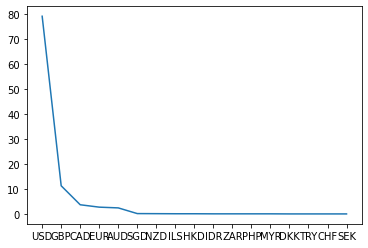

In [76]:
plt.plot(c);

In [86]:
string=sorted_rev_ct['languages'][0]
string

"['en-US']"

In [87]:
sorted_rev_ct

,Unnamed: 0,shop_id,shop_name,user_id,create_date,created_timestamp,title,announcement,currency_code,is_vacation,vacation_message,sale_message,digital_sale_message,update_date,updated_timestamp,listing_active_count,digital_listing_count,login_name,accepts_custom_requests,vacation_autoreply,url,image_url_760x100,num_favorers,languages,icon_url_fullxfull,is_using_structured_policies,has_onboarded_structured_policies,include_dispute_form_link,is_direct_checkout_onboarded,is_etsy_payments_onboarded,is_opted_in_to_buyer_promise,is_calculated_eligible,is_shop_us_based,transaction_sold_count,shipping_from_country_iso,shop_location_country_iso,policy_welcome,policy_payment,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_update_date,policy_has_private_receipt_info,has_unstructured_policies,policy_privacy,review_average,review_count,colD
4873,472,11355547,PersonalizationMall,8532479,2015-07-06 16:56:49,2015-07-06 16:56:49,"life, personalized.",NaN,USD,False,NaN,NaN,NaN,2022-06-21 21:14:25,2022-06-21 21:14:25,2927,0,PersonalizationMall,False,NaN,https://www.etsy.com/shop/PersonalizationMall,https://i.etsystatic.com/iusb/538851/53306824/...,4808,['en-US'],https://i.etsystatic.com/isla/739e33/42993118/...,True,True,False,True,True,True,True,True,205640,US,US,NaN,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,"I DON'T ACCEPT RETURNS, EXCHANGES, OR CANCELLA...",CUSTOM AND PERSONALIZED ORDERS\nReturns & Exch...,NaN,0,False,False,NaN,4.8474,22917.0,['en-US']
1558,1558,9609713,904Custom,49342455,2014-06-11 13:47:44,2014-06-11 13:47:44,"Personalized Gifts, Custom Stamps and Desk Pla...",Thank you for selecting 904 Custom for all of ...,USD,False,Hello and thanks for visiting! I’m working on ...,Thank you so much for your order!\r\n\r\nIf yo...,NaN,2022-06-21 17:44:15,2022-06-21 17:44:15,520,0,DesignsByJillEtsy,True,Hello and thanks for your message! I’m working...,https://www.etsy.com/shop/904Custom,https://i.etsystatic.com/iusb/45bcd2/24661003/...,11136,"['en-US', 'es']",https://i.etsystatic.com/isla/adafb0/45343297/...,False,False,False,True,True,True,True,True,203474,US,US,Welcome to my shop :),We accept anything Etsy accepts. :),Most orders are shipped using USPS First Class...,All products are made to order. No refunds unl...,NaN,NaN,1652136321,False,True,NaN,4.8303,11300.0,"['en-US', 'es']"
59,59,19242740,MandyLynnPlans,193982286,2019-01-19 01:33:39,2019-01-19 01:33:39,Helping you add some fun to your functional pl...,FREE shipping on all US orders over $35! \r\n\...,USD,False,Sorry you missed us!\r\nWe are closing the sho...,Thank you so much for your order! I really app...,NaN,2022-06-21 15:25:07,2022-06-21 15:25:07,1833,0,m8advqzg,True,Sorry you missed us!\r\nWe are closing the sho...,https://www.etsy.com/shop/MandyLynnPlans,https://i.etsystatic.com/iusb/121198/40303359/...,5002,['en-US'],https://i.etsystatic.com/isla/caab78/39758546/...,True,True,False,True,True,True,True,True,113047,US,US,NaN,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,"I DON'T ACCEPT RETURNS, EXCHANGES, OR CANCELLA...",NaN,NaN,0,False,False,NaN,4.9925,9354.0,['en-US']
3761,1660,23359354,inspireddecorco,307470584,2020-05-19 21:36:02,2020-05-19 21:36:02,Custom-made Home Decor,Thank you visiting inspireddecorco! Our passio...,USD,False,Hello and thanks for visiting! I’m working on ...,Thank you for your purchase! Please take a mom...,NaN,2022-06-21 21:39:17,2022-06-21 21:39:17,1543,0,2rf79xaw,True,Hello and thanks for your message! I’m working...,https://www.etsy.com/shop/inspireddecorco,NaN,3366,['en-US'],https://i.etsystatic.com/isla/f6c240/51388136/...,True,True,False,True,True,True,True,True,42353,US,US,NaN,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,- *Please double check the shipping address on...,NaN,0,False,False,*Please dou

In [91]:
import seaborn as sns
import numpy as np

C:\Users\MEGANG~1\AppData\Local\Temp/ipykernel_23868/1186745104.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


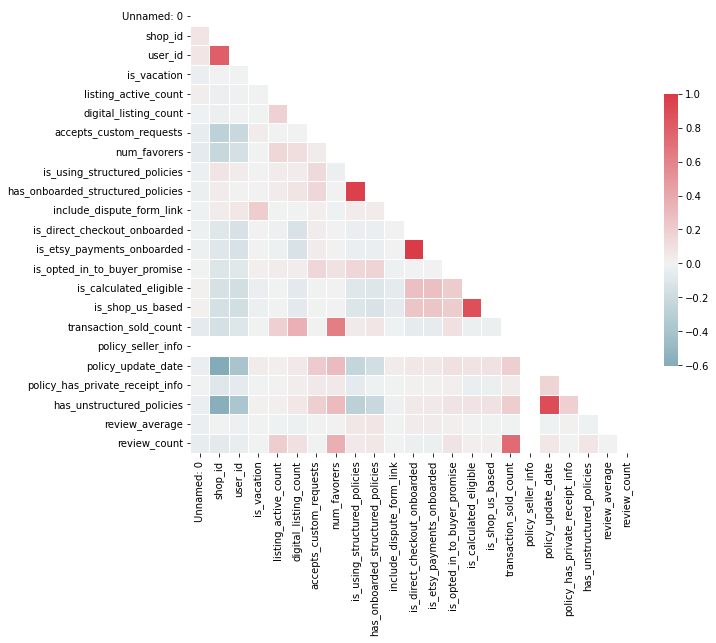

In [92]:
#looking for areas of strong correlation to dig into with deeper analysis
fig, ax = plt.subplots(figsize=(10, 10))
corr = sorted_rev_ct.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap=cmap, mask = mask, center=0,
          square=True, linewidths=.5, cbar_kws={"shrink": .5});